Libraries required to run the code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from IPython.display import display
import math
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

Read data from CSV

In [2]:
df = pd.read_csv("data_week3.csv", names=["x1", "x2", "y"], header=None, comment='#')
display(df.head())
x1 = df.iloc[:,0]
x2 = df.iloc[:,1]
x = np.column_stack((x1, x2))
y = df.iloc[:,2]

,x1,x2,y
0,-0.45,-0.72,-1.025864
1,0.11,0.21,0.056347
2,-0.89,-0.68,-1.889089
3,0.84,-0.12,-1.427458
4,-0.42,-0.37,-0.187069


3-D Scatter plot of the loaded data showing x1 on x-axis, x2 on y-axis and y on z-axis

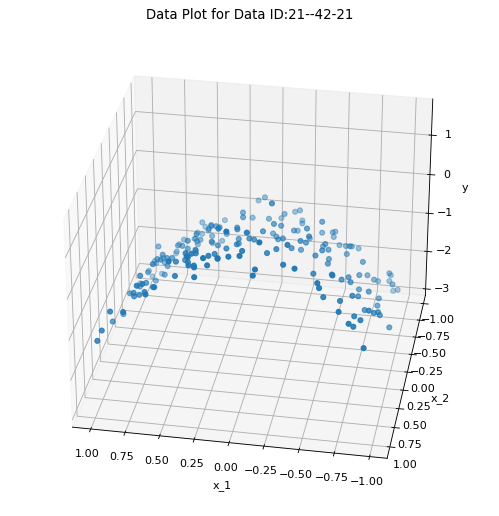

In [3]:
figure = plot.figure(figsize=(8, 8), dpi = 80)
plot_final = figure.add_subplot(111, projection = '3d')
plot_final.scatter(x1, x2, y)
plot_final.set_xlabel("x_1")
plot_final.set_ylabel("x_2")
plot_final.set_zlabel("y")
plot_final.set_title('Data Plot for Data ID:21--42-21')
plot_final.view_init(azim = 100)

Initialising the penalty parameter C

In [4]:
penalty_parameters = [1, 5, 10, 100, 500, 1000]

Adding polynomial feature of upto Degree 5 to train data

In [5]:
poly_features_function = PolynomialFeatures(5)
x_poly_features  = poly_features_function.fit_transform(x)

Creating a an array of headers of the polynomial features to be used for data presentation

In [6]:
temp_df = pd.DataFrame(x, columns = ['x1', 'x2'])
feature_names = poly_features_function.get_feature_names(temp_df.columns)
feature_names.insert(0, 'Penalty')
feature_names.insert(1, 'Intercept')

## Lasso Regression

In [7]:
lasso_model_dictionary = {}

lasso_model_params_df = pd.DataFrame(columns = feature_names)
lasso_model_equation_df = pd.DataFrame(columns = ['Penalty', 'Model Equation'])
for penalty in penalty_parameters:
    lasso_model = Lasso(alpha = 1 / (2 * penalty))
    lasso_model.fit(x_poly_features, y)
    
    model_dict = {}
    model_dict['Penalty'] = penalty
    model_dict['Intercept'] = [np.around(lasso_model.intercept_, decimals = 3)]
    for i in range(2,23) :
        model_dict[feature_names[i]] = [np.around(lasso_model.coef_[i-2], decimals = 3)]
    
    lasso_model_params_df = lasso_model_params_df.append(model_dict, ignore_index = True)
    
    model_eq_dict = {}
    model_eq_dict['Penalty'] = penalty
    equation_string = ''
    for i in range(2,23) :
        coeff = np.around(lasso_model.coef_[i-2], decimals = 3)
        if coeff != 0 : 
            equation_string += '(' + str(coeff) + ')' + ' * ' + feature_names[i] + ' + '
    
    equation_string += '(' + str(np.around(lasso_model.intercept_, decimals = 3)) + ')'
    model_eq_dict['Model Equation'] = equation_string
    
    lasso_model_equation_df = lasso_model_equation_df.append(model_eq_dict, ignore_index = True)
    
    lasso_model_dictionary[penalty] = lasso_model

lasso_model_params_df = lasso_model_params_df.style.applymap(lambda x:'white-space:nowrap')
display(lasso_model_params_df)

lasso_model_equation_df = lasso_model_equation_df.style.set_properties(**{'text-align': 'left'})
lasso_model_equation_df = lasso_model_equation_df.applymap(lambda x:'white-space:nowrap')
display(lasso_model_equation_df)

,Penalty,Intercept,1,x1,x2,x1^2,x1 x2,x2^2,x1^3,x1^2 x2,x1 x2^2,x2^3,x1^4,x1^3 x2,x1^2 x2^2,x1 x2^3,x2^4,x1^5,x1^4 x2,x1^3 x2^2,x1^2 x2^3,x1 x2^4,x2^5
0,1,[-0.697],[0.0],[-0.0],[0.0],[-0.0],[0.0],[0.0],[-0.0],[0.0],[0.0],[0.0],[-0.0],[0.0],[-0.0],[0.0],[0.0],[-0.0],[0.0],[-0.0],[0.0],[0.0],[0.0]
1,5,[-0.401],[0.0],[-0.0],[0.741],[-0.825],[0.0],[0.0],[-0.0],[0.0],[-0.0],[0.0],[-0.0],[-0.0],[-0.0],[-0.0],[0.0],[-0.0],[0.0],[-0.0],[0.0],[-0.0],[0.0]
2,10,[-0.194],[0.0],[-0.0],[0.871],[-1.426],[-0.0],[-0.0],[-0.0],[0.0],[-0.0],[0.0],[-0.0],[-0.0],[-0.0],[-0.0],[-0.0],[-0.0],[0.0],[-0.0],[0.0],[-0.0],[0.0]
3,100,[-0.004],[0.0],[-0.036],[0.991],[-1.965],[-0.025],[-0.008],[-0.0],[-0.0],[-0.0],[0.0],[-0.0],[-0.0],[-0.006],[-0.0],[-0.0],[-0.0],[-0.0],[-0.0],[-0.0],[-0.0],[0.0]
4,500,[0.015],[0.0],[-0.049],[1.048],[-1.965],[-0.057],[-0.0],[0.0],[-0.145],[-0.0],[0.012],[-0.023],[-0.0],[-0.088],[-0.0],[-0.03],[0.0],[-0.0],[-0.0],[0.0],[0.0],[0.0]
5,1000,[0.015],[0.0],[-0.07],[1.065],[-1.943],[-0.048],[-0.0],[0.039],[-0.209],[-0.01],[0.0],[-0.052],[0.0],[-0.107],[-0.02],[-0.029],[-0.0],[-0.016],[-0.0],[0.081],[0.0],[-0.0]


,Penalty,Model Equation
0,1,(-0.697)
1,5,(0.741) * x2 + (-0.825) * x1^2 + (-0.401)
2,10,(0.871) * x2 + (-1.426) * x1^2 + (-0.194)
3,100,(-0.036) * x1 + (0.991) * x2 + (-1.965) * x1^2 + (-0.025) * x1 x2 + (-0.008) * x2^2 + (-0.006) * x1^2 x2^2 + (-0.004)
4,500,(-0.049) * x1 + (1.048) * x2 + (-1.965) * x1^2 + (-0.057) * x1 x2 + (-0.145) * x1^2 x2 + (0.012) * x2^3 + (-0.023) * x1^4 + (-0.088) * x1^2 x2^2 + (-0.03) * x2^4 + (0.015)
5,1000,(-0.07) * x1 + (1.065) * x2 + (-1.943) * x1^2 + (-0.048) * x1 x2 + (0.039) * x1^3 + (-0.209) * x1^2 x2 + (-0.01) * x1 x2^2 + (-0.052) * x1^4 + (-0.107) * x1^2 x2^2 + (-0.02) * x1 x2^3 + (-0.029) * x2^4 + (-0.016) * x1^4 x2 + (0.081) * x1^2 x2^3 + (0.015)


In [8]:
lasso_model_dictionary

{1: Lasso(alpha=0.5),
 5: Lasso(alpha=0.1),
 10: Lasso(alpha=0.05),
 100: Lasso(alpha=0.005),
 500: Lasso(alpha=0.001),
 1000: Lasso(alpha=0.0005)}

Checking the min and max of train data to generate test data

In [9]:
print(math.floor(x_poly_features.min()))
print(math.ceil(x_poly_features.max()))

-1
1


Generating test features

In [10]:
x_test_features = []
grid = np.linspace(-4, 4)
for i in grid : 
    for j in grid : 
        x_test_features.append([i, j])
x_test_features = np.array(x_test_features)

Adding polynomial feature of upto Degree 5 to test data

In [11]:
poly_features_function = PolynomialFeatures(5)
x_poly_test_features  = poly_features_function.fit_transform(x_test_features)

In [12]:
x_poly_test_features

array([[ 1.00000000e+00, -4.00000000e+00, -4.00000000e+00, ...,
        -1.02400000e+03, -1.02400000e+03, -1.02400000e+03],
       [ 1.00000000e+00, -4.00000000e+00, -3.83673469e+00, ...,
        -9.03660482e+02, -8.66776380e+02, -8.31397753e+02],
       [ 1.00000000e+00, -4.00000000e+00, -3.67346939e+00, ...,
        -7.93138913e+02, -7.28392879e+02, -6.68932236e+02],
       ...,
       [ 1.00000000e+00,  4.00000000e+00,  3.67346939e+00, ...,
         7.93138913e+02,  7.28392879e+02,  6.68932236e+02],
       [ 1.00000000e+00,  4.00000000e+00,  3.83673469e+00, ...,
         9.03660482e+02,  8.66776380e+02,  8.31397753e+02],
       [ 1.00000000e+00,  4.00000000e+00,  4.00000000e+00, ...,
         1.02400000e+03,  1.02400000e+03,  1.02400000e+03]])

Using Trained Lasso Regression models to do predictions on test features and generating scatter plots

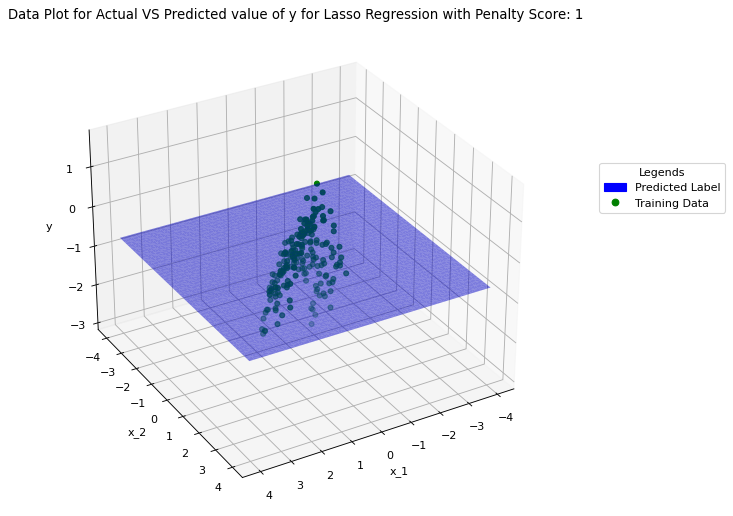

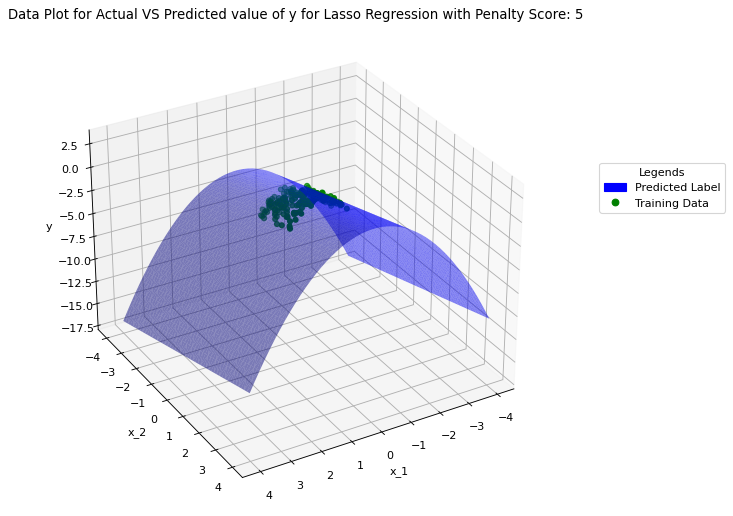

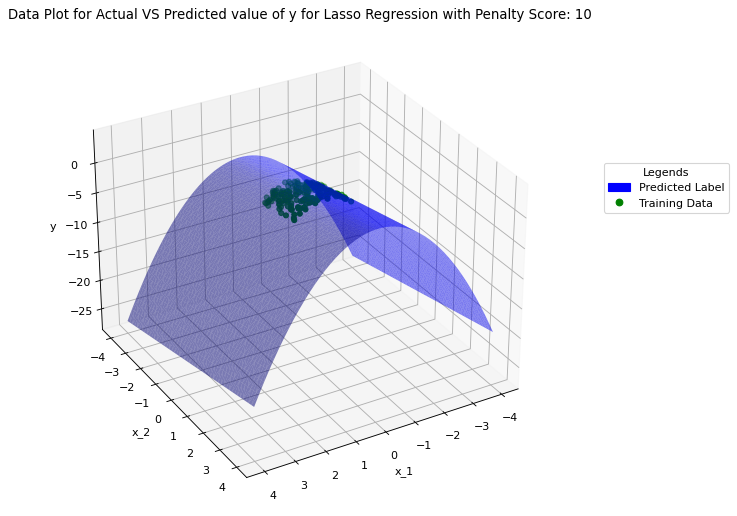

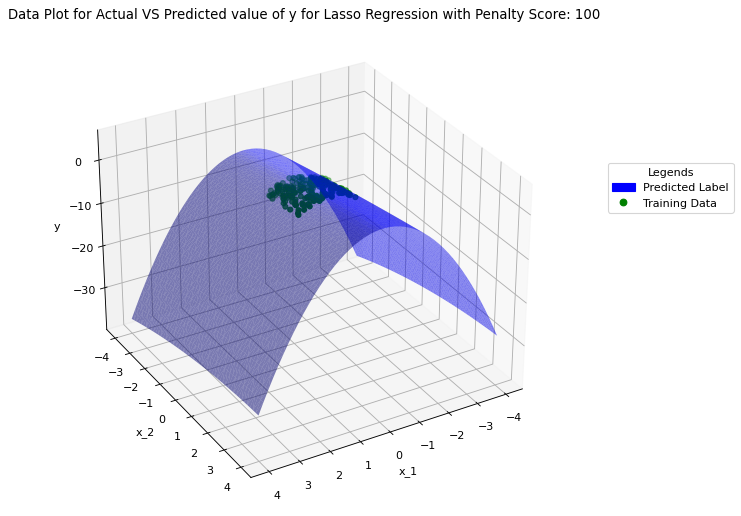

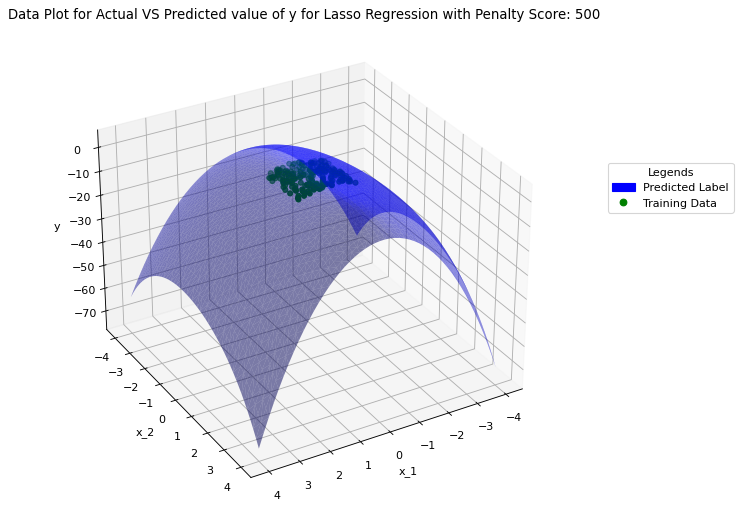

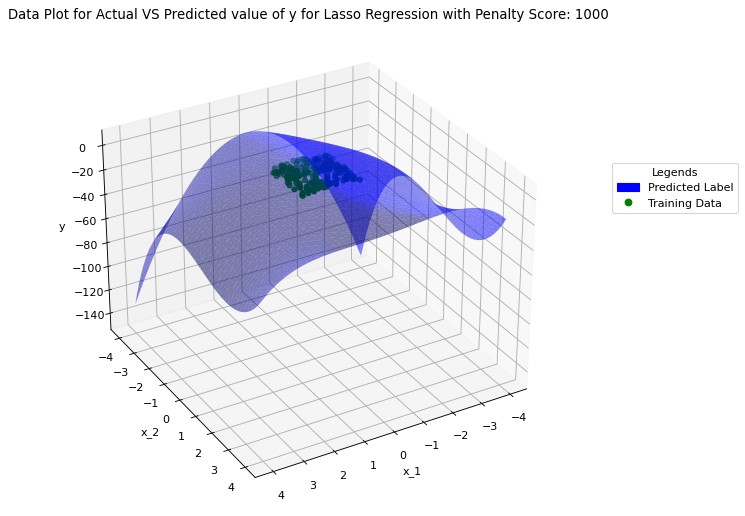

In [13]:
for key in lasso_model_dictionary :
    Lasso_Model = lasso_model_dictionary[key]
    prdctns = Lasso_Model.predict(x_poly_test_features)
    
    figure = plot.figure(figsize=(8, 8), dpi = 80)
    plot_final = figure.add_subplot(111, projection = '3d')
    
    plot_final.plot_trisurf(x_test_features[:,0], x_test_features[:,1], prdctns, alpha = 0.5, color = "blue")
    
    plot_final.scatter(x1, x2, y, color = "green", marker = "o")
    
    plot_final.set_xlabel('x_1')
    plot_final.set_ylabel('x_2') 
    plot_final.set_zlabel('y')
    plot_final.set_title('Data Plot for Actual VS Predicted value of y for Lasso Regression with Penalty Score: {}'.format(key))
    
    handles, labels = plot.gca().get_legend_handles_labels()
    
    prediction_legend = mpatches.Patch(color='blue', label = "Predicted Label")
    test_legend = Line2D([0], [0], color='green', linestyle="none", label = "Training Data", marker = "o") 
    
    handles.extend([prediction_legend, test_legend])
    
    plot_final.legend(handles = handles, title="Legends", loc = 'lower right', bbox_to_anchor=(1.4, 0.6))
    plot_final.view_init(azim = 60) 

## Ridge Regression

In [14]:

ridge_model_dictionary = {}

ridge_model_params_df = pd.DataFrame(columns = feature_names)
ridge_model_equation_df = pd.DataFrame(columns = ['Penalty', 'Model Equation'])
for penalty in penalty_parameters:
    ridge_model = Ridge(alpha = 1 / (2 * penalty))
    ridge_model.fit(x_poly_features, y)
    
    model_dict = {}
    model_dict['Penalty'] = penalty
    model_dict['Intercept'] = [np.around(ridge_model.intercept_, decimals = 3)]
    for i in range(2,23) :
        model_dict[feature_names[i]] = [np.around(ridge_model.coef_[i-2], decimals = 3)]
    
    ridge_model_params_df = ridge_model_params_df.append(model_dict, ignore_index = True)
    
    model_eq_dict = {}
    model_eq_dict['Penalty'] = penalty
    equation_string = ''
    for i in range(2,23) :
        coeff = np.around(ridge_model.coef_[i-2], decimals = 3)
        if coeff != 0 : 
            equation_string += '(' + str(coeff) + ')' + ' * ' + feature_names[i] + ' + '
    
    equation_string += '(' + str(np.around(ridge_model.intercept_, decimals = 3)) + ')'
    model_eq_dict['Model Equation'] = equation_string
    
    ridge_model_equation_df = ridge_model_equation_df.append(model_eq_dict, ignore_index = True)
    
    ridge_model_dictionary[penalty] = ridge_model

ridge_model_params_df = ridge_model_params_df.style.applymap(lambda x:'white-space:nowrap')
display(ridge_model_params_df)

ridge_model_equation_df = ridge_model_equation_df.style.set_properties(**{'text-align': 'left'})
ridge_model_equation_df = ridge_model_equation_df.applymap(lambda x:'white-space:nowrap')
display(ridge_model_equation_df)


,Penalty,Intercept,1,x1,x2,x1^2,x1 x2,x2^2,x1^3,x1^2 x2,x1 x2^2,x2^3,x1^4,x1^3 x2,x1^2 x2^2,x1 x2^3,x2^4,x1^5,x1^4 x2,x1^3 x2^2,x1^2 x2^3,x1 x2^4,x2^5
0,1,[-0.053],[0.0],[-0.092],[0.98],[-1.512],[-0.058],[0.044],[0.118],[-0.113],[-0.116],[0.207],[-0.461],[0.05],[-0.237],[-0.042],[-0.02],[-0.04],[-0.148],[0.017],[0.112],[0.108],[-0.133]
1,5,[-0.007],[0.0],[-0.139],[1.053],[-1.824],[-0.082],[0.072],[0.391],[-0.32],[-0.258],[0.213],[-0.157],[0.075],[-0.178],[-0.048],[-0.087],[-0.286],[-0.141],[-0.039],[0.368],[0.318],[-0.251]
2,10,[0.002],[0.0],[-0.169],[1.072],[-1.902],[-0.087],[0.088],[0.546],[-0.406],[-0.305],[0.224],[-0.073],[0.075],[-0.167],[-0.045],[-0.113],[-0.422],[-0.112],[-0.077],[0.453],[0.399],[-0.292]
3,100,[0.012],[0.0],[-0.23],[1.096],[-1.999],[-0.095],[0.115],[0.831],[-0.54],[-0.358],[0.25],[0.034],[0.069],[-0.155],[-0.036],[-0.152],[-0.667],[-0.048],[-0.147],[0.569],[0.51],[-0.355]
4,500,[0.013],[0.0],[-0.238],[1.098],[-2.009],[-0.095],[0.118],[0.87],[-0.557],[-0.363],[0.254],[0.046],[0.069],[-0.154],[-0.034],[-0.157],[-0.701],[-0.039],[-0.157],[0.582],[0.523],[-0.364]
5,1000,[0.013],[0.0],[-0.239],[1.099],[-2.011],[-0.096],[0.119],[0.875],[-0.559],[-0.364],[0.255],[0.047],[0.068],[-0.153],[-0.034],[-0.158],[-0.705],[-0.037],[-0.158],[0.584],[0.525],[-0.365]


,Penalty,Model Equation
0,1,(-0.092) * x1 + (0.98) * x2 + (-1.512) * x1^2 + (-0.058) * x1 x2 + (0.044) * x2^2 + (0.118) * x1^3 + (-0.113) * x1^2 x2 + (-0.116) * x1 x2^2 + (0.207) * x2^3 + (-0.461) * x1^4 + (0.05) * x1^3 x2 + (-0.237) * x1^2 x2^2 + (-0.042) * x1 x2^3 + (-0.02) * x2^4 + (-0.04) * x1^5 + (-0.148) * x1^4 x2 + (0.017) * x1^3 x2^2 + (0.112) * x1^2 x2^3 + (0.108) * x1 x2^4 + (-0.133) * x2^5 + (-0.053)
1,5,(-0.139) * x1 + (1.053) * x2 + (-1.824) * x1^2 + (-0.082) * x1 x2 + (0.072) * x2^2 + (0.391) * x1^3 + (-0.32) * x1^2 x2 + (-0.258) * x1 x2^2 + (0.213) * x2^3 + (-0.157) * x1^4 + (0.075) * x1^3 x2 + (-0.178) * x1^2 x2^2 + (-0.048) * x1 x2^3 + (-0.087) * x2^4 + (-0.286) * x1^5 + (-0.141) * x1^4 x2 + (-0.039) * x1^3 x2^2 + (0.368) * x1^2 x2^3 + (0.318) * x1 x2^4 + (-0.251) * x2^5 + (-0.007)
2,10,(-0.169) * x1 + (1.072) * x2 + (-1.902) * x1^2 + (-0.087) * x1 x2 + (0.088) * x2^2 + (0.546) * x1^3 + (-0.406) * x1^2 x2 + (-0.305) * x1 x2^2 + (0.224) * x2^3 + (-0.073) * x1^4 + (0.075) * x1^3 x2 + (-0.167) * x1^2 x2^2 + (-0.045) * x1 x2^3 + (-0.113) * x2^4 + (-0.422) * x1^5 + (-0.112) * x1^4 x2 + (-0.077) * x1^3 x2^2 + (0.453) * x1^2 x2^3 + (0.399) * x1 x2^4 + (-0.292) * x2^5 + (0.002)
3,100,(-0.23) * x1 + (1.096) * x2 + (-1.999) * x1^2 + (-0.095) * x1 x2 + (0.115) * x2^2 + (0.831) * x1^3 + (-0.54) * x1^2 x2 + (-0.358) * x1 x2^2 + (0.25) * x2^3 + (0.034) * x1^4 + (0.069) * x1^3 x2 + (-0.155) * x1^2 x2^2 + (-0.036) * x1 x2^3 + (-0.152) * x2^4 + (-0.667) * x1^5 + (-0.048) * x1^4 x2 + (-0.147) * x1^3 x2^2 + (0.569) * x1^2 x2^3 + (0.51) * x1 x2^4 + (-0.355) * x2^5 + (0.012)
4,500,(-0.238) * x1 + (1.098) * x2 + (-2.009) * x1^2 + (-0.095) * x1 x2 + (0.118) * x2^2 + (0.87) * x1^3 + (-0.557) * x1^2 x2 + (-0.363) * x1 x2^2 + (0.254) * x2^3 + (0.046) * x1^4 + (0.069) * x1^3 x2 + (-0.154) * x1^2 x2^2 + (-0.034) * x1 x2^3 + (-0.157) * x2^4 + (-0.701) * x1^5 + (-0.039) * x1^4 x2 + (-0.157) * x1^3 x2^2 + (0.582) * x1^2 x2^3 + (0.523) * x1 x2^4 + (-0.364) * x2^5 + (0.013)
5,1000,(-0.239) * x1 + (1.099) * x2 + (-2.011) * x1^2 + (-0.096) * x1 x2 + (0.119) * x2^2 + (0.875) * x1^3 + (-0.559) * x1^2 x2 + (-0.364) * x1 x2^2 + (0.255) * x2^3 + (0.047) * x1^4 + (0.068) * x1^3 x2 + (-0.153) * x1^2 x2^2 + (-0.034) * x1 x2^3 + (-0.158) * x2^4 + (-0.705) * x1^5 + (-0.037) * x1^4 x2 + (-0.158) * x1^3 x2^2 + (0.584) * x1^2 x2^3 + (0.525) * x1 x2^4 + (-0.365) * x2^5 + (0.013)


Using Trained Ridge Regression models to do predictions on test features and generating scatter plots

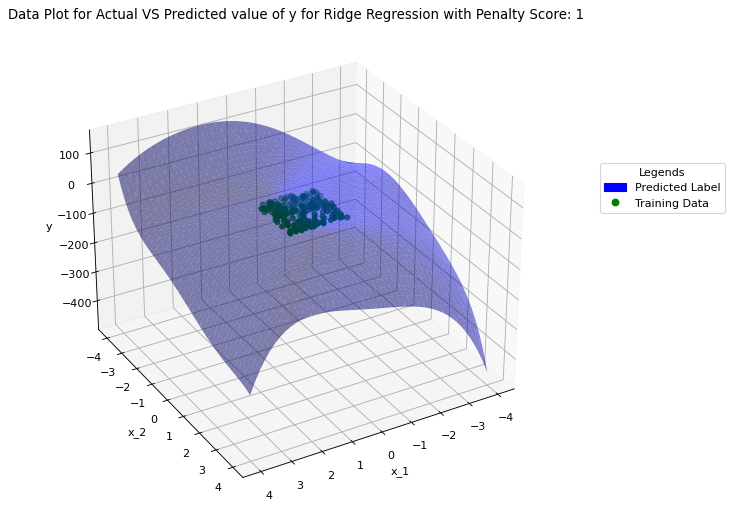

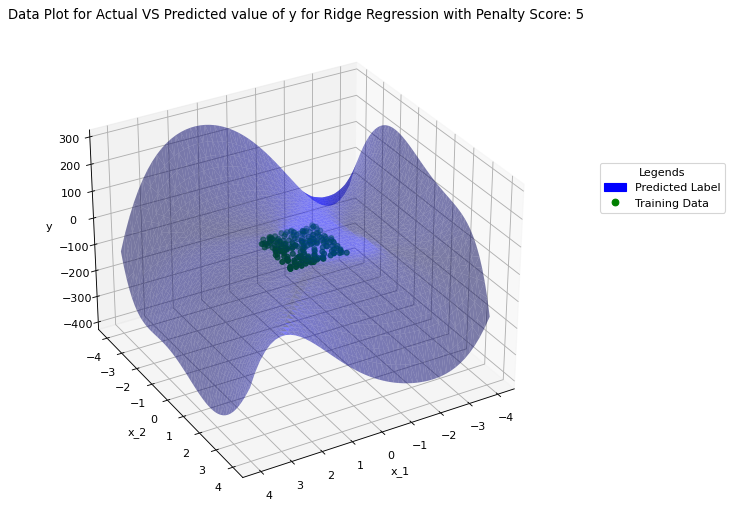

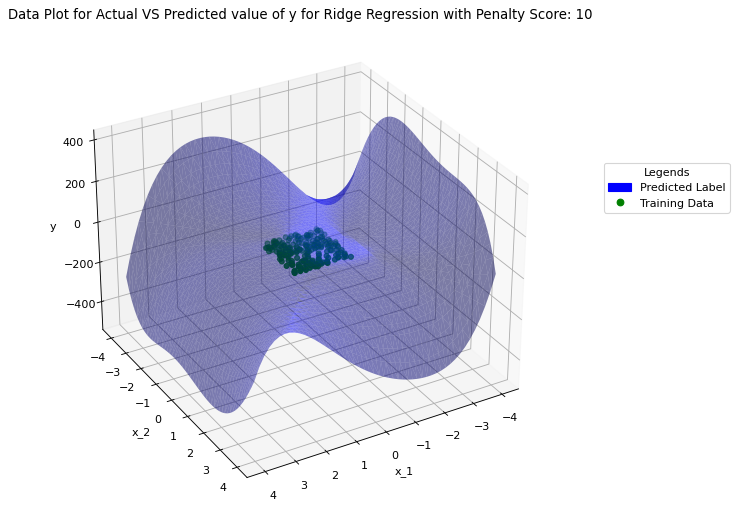

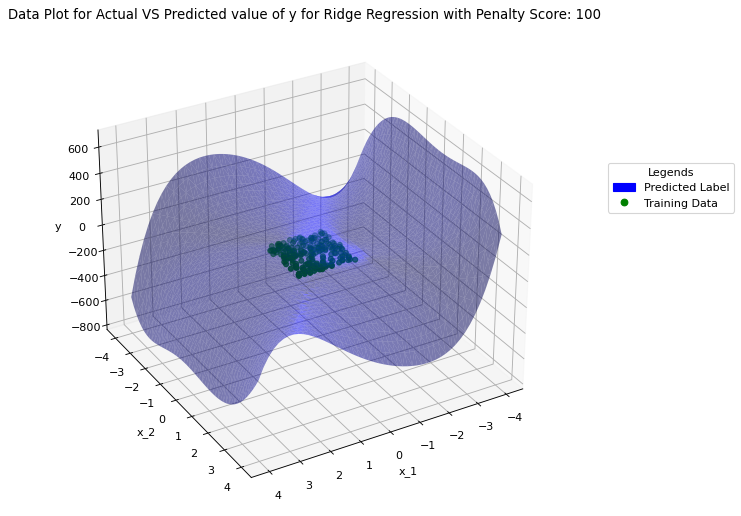

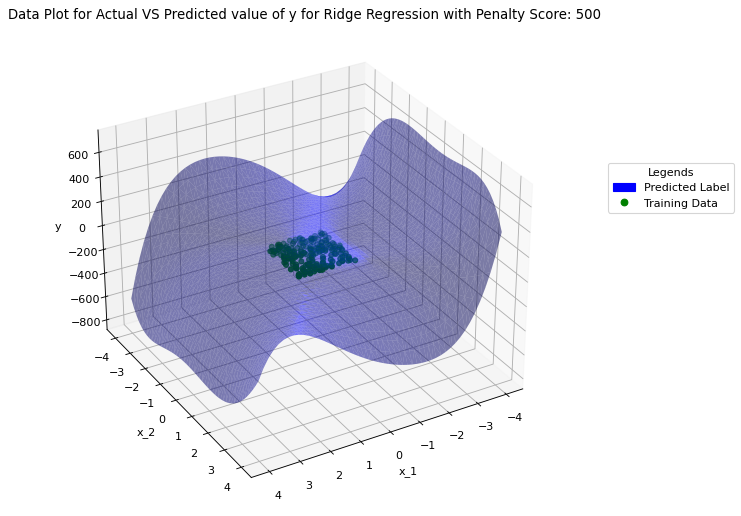

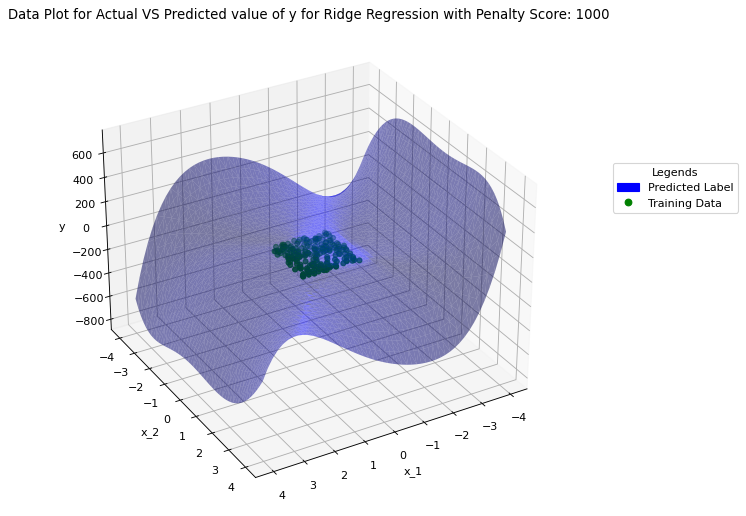

In [15]:
for key in ridge_model_dictionary :
    Ridge_Model = ridge_model_dictionary[key]
    prdctns = Ridge_Model.predict(x_poly_test_features)
    
    figure = plot.figure(figsize=(8, 8), dpi = 80)
    plot_final = figure.add_subplot(111, projection = '3d')
    
    plot_final.plot_trisurf(x_test_features[:,0], x_test_features[:,1], prdctns, alpha = 0.5, color = "blue")
    
    plot_final.scatter(x1, x2, y, color = "green", marker = "o")
    
    plot_final.set_xlabel('x_1')
    plot_final.set_ylabel('x_2') 
    plot_final.set_zlabel('y')
    plot_final.set_title('Data Plot for Actual VS Predicted value of y for Ridge Regression with Penalty Score: {}'.format(key))
    
    handles, labels = plot.gca().get_legend_handles_labels()
    
    prediction_legend = mpatches.Patch(color='blue', label = "Predicted Label")
    test_legend = Line2D([0], [0], color='green', linestyle="none", label = "Training Data", marker = "o") 
    
    handles.extend([prediction_legend, test_legend])
    
    plot_final.legend(handles = handles, title="Legends", loc = 'lower right', bbox_to_anchor=(1.4, 0.6))
    plot_final.view_init(azim = 60) 